# Feature Detection

Feature detection is an image processing technique that examines every pixel to determine if there is a feature present at that pixel. We will explore multiple types of feature detection in this practical.
<br/><br/>
**Edge Detection**
<br/>


In [2]:
import sys
print(sys.executable)
print(sys.prefix)
print(sys.exec_prefix)

C:\Users\helen\virtualenvtest\Scripts\python.exe
C:\Users\helen\virtualenvtest
C:\Users\helen\virtualenvtest


In [3]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

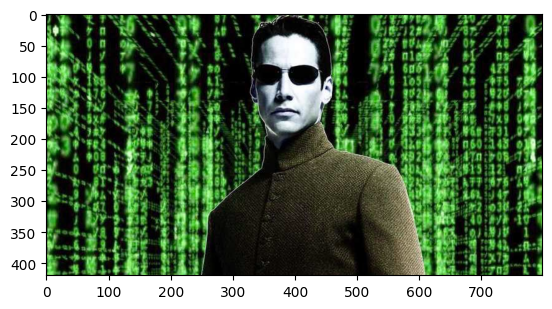

In [4]:
# Load Image
matriximg = cv2.imread('TheMatrix.jpeg')
plt.imshow(matriximg)

In [5]:
#Finding the threshold for Edge Detection to use with Canny
medianval = np.median(matriximg)
medianval

37.0

In this case we are just using the median for the lower theshold. If the threshold values are changed it can give significantly different results. Read more about the Canny Edge Detector here: https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html

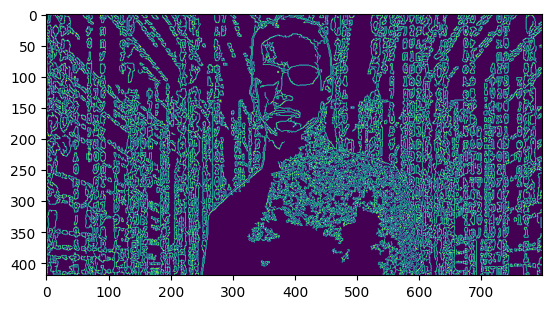

In [6]:
edges = cv2.Canny(image=matriximg, threshold1=medianval, threshold2=255)
plt.imshow(edges)

Pre-processing prior to completing Edge Detection such as blurring the image can provide better results.

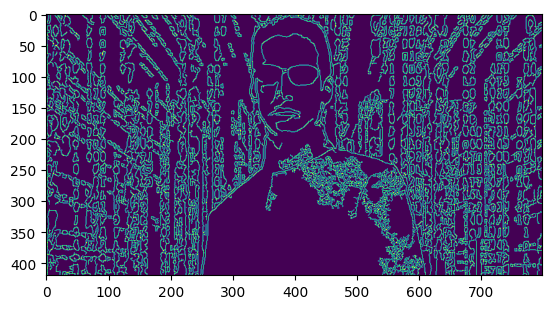

In [8]:
blurred_img = cv2.blur(matriximg,ksize=(3,3)) #Change the kernel size to see the impact.
edges = cv2.Canny(image=blurred_img, threshold1=medianval, threshold2=255)
plt.imshow(edges)

# Homework Q1
Perform two different pre-processing techniques on the image to improve the edge detection. Also apply to a grayscale image.

**Corner Detection**

Text(0.5, 1.0, 'Real Chess Board')

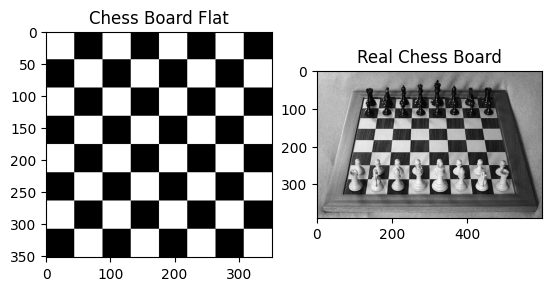

In [14]:
chessboard = cv2.imread('chessboard.png')
# chessboard = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/chessboard.png')
chessboardcolour = cv2.cvtColor(chessboard,cv2.COLOR_BGR2RGB)
chessboard = cv2.cvtColor(chessboard,cv2.COLOR_BGR2GRAY)

realchessboard = cv2.imread('RealChess.jpg')
# realchessboard = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/RealChess.jpg')
realchessboardcolour = cv2.cvtColor(realchessboard,cv2.COLOR_BGR2RGB)
realchessboard = cv2.cvtColor(realchessboard,cv2.COLOR_BGR2GRAY)

# Plot the Images
plt.subplot(121)
plt.imshow(chessboard,cmap='gray')
plt.title('Chess Board Flat')
    
plt.subplot(122)
plt.imshow(realchessboard,cmap='gray')
plt.title('Real Chess Board')

**Harris Corner Detection**

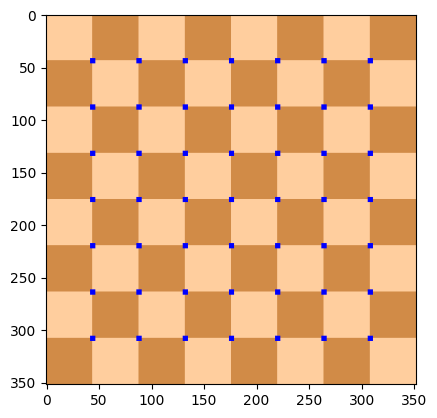

In [7]:
gray = np.float32(chessboard) #Convert pixels to floating points
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

#This is only important for the output
dst = cv2.dilate(dst,None)

#Threshold for an optimal value, it may vary depending on the image.
chessboardcolour[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(chessboardcolour)

This picks up the corners of the board well enough. It won't pick up the corners at the edges of the board as it is just treating them as edges, there are no corner features. We will now try the exact same code on a real chess board.

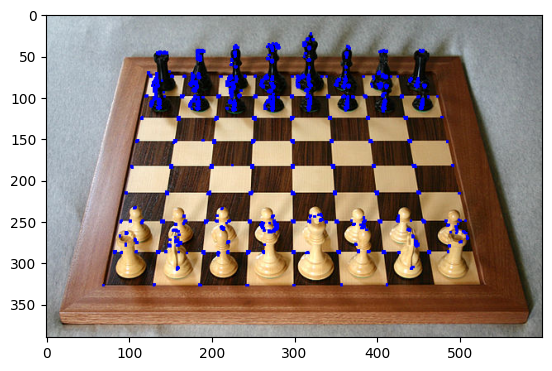

In [8]:
gray = np.float32(realchessboard) #Convert pixels to floating points
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

#This is only important for the output
dst = cv2.dilate(dst,None)

#Threshold for an optimal value, it may vary depending on the image.
realchessboardcolour[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(realchessboardcolour)

It is also working on a real chess board but you can see that it is also picking up corners in the chess pieces as well as the board.

**Shi-Tomasi Corner Detection**

In [9]:
#Reloading Images
chessboard = cv2.imread('chessboard.png')
# chessboard = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/chessboard.png')
chessboardcolour = cv2.cvtColor(chessboard,cv2.COLOR_BGR2RGB)
chessboard = cv2.cvtColor(chessboard,cv2.COLOR_BGR2GRAY)

realchessboard = cv2.imread('RealChess.jpg')
# realchessboard = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/RealChess.jpg')
realchessboardcolour = cv2.cvtColor(realchessboard,cv2.COLOR_BGR2RGB)
realchessboard = cv2.cvtColor(realchessboard,cv2.COLOR_BGR2GRAY)

C:\Users\helen\AppData\Local\Temp\ipykernel_13700\3355804921.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


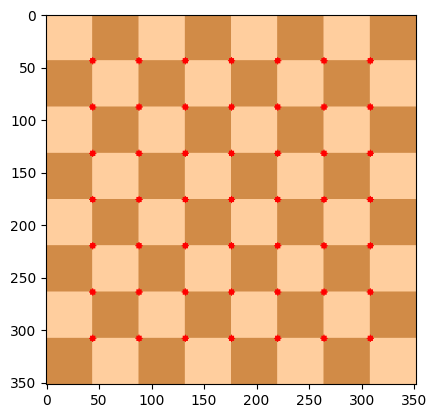

In [10]:
corners = cv2.goodFeaturesToTrack(chessboard,49,0.01,10) #Try values less than 49, remember to reload the image every time.
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(chessboardcolour,(x,y),3,255,-1)

plt.imshow(chessboardcolour)

C:\Users\helen\AppData\Local\Temp\ipykernel_13700\348038271.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


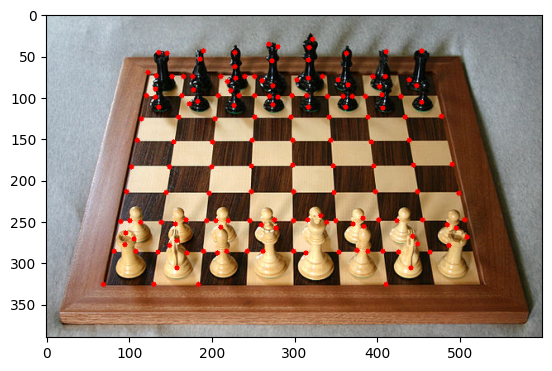

In [11]:
corners = cv2.goodFeaturesToTrack(realchessboard,160,0.01,10) #Try values less/more than 160, remember to reload the image every time.
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(realchessboardcolour,(x,y),3,255,-1)

plt.imshow(realchessboardcolour)

**Grid Detection**

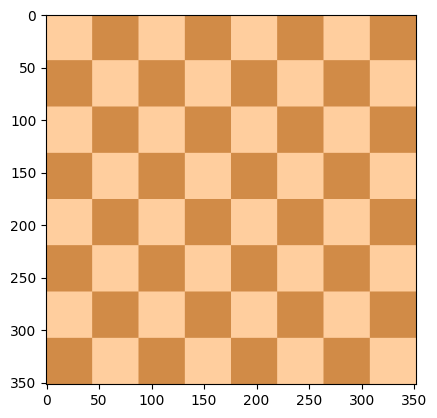

In [12]:
#Reloading Chess Board
chessboard = cv2.imread('chessboard.png')
# chessboard = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/chessboard.png')
chessboard = cv2.cvtColor(chessboard,cv2.COLOR_BGR2RGB)
plt.imshow(chessboard)

In [13]:
found, corners = cv2.findChessboardCorners(chessboard,(7,7))
if found:
    print('Found corners')
else:
    print("Did not find corners")

Found corners


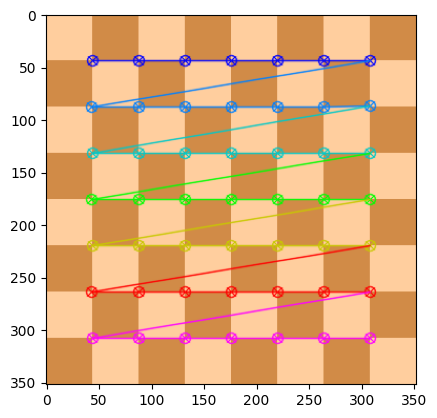

In [14]:
chessboard = cv2.drawChessboardCorners(chessboard, (7, 7), corners, found)
plt.imshow(chessboard) #This is used mostly for Camera Callibration.

**Contour Detection**

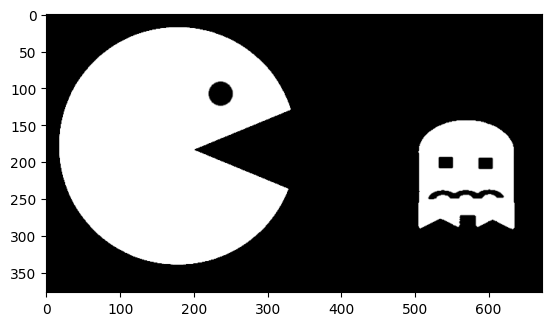

In [15]:
pacman = cv2.imread('Pacman.png',0)
# pacman = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/Pacman.png',0)
plt.imshow(pacman,cmap='gray')

In [16]:
contours, hierarchy = cv2.findContours(pacman, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

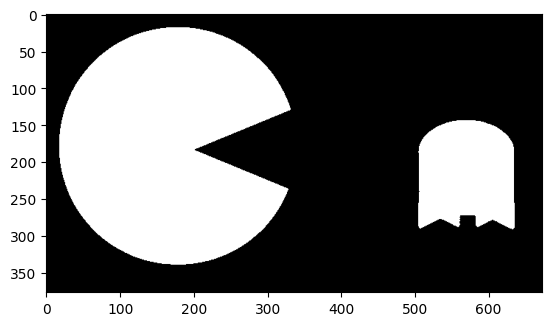

In [17]:
# Set up empty array
external_contours = np.zeros(pacman.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

plt.imshow(external_contours,cmap='gray')

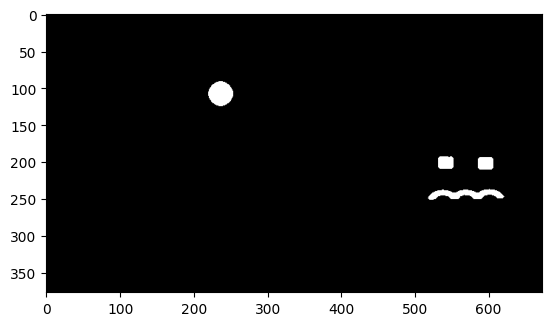

In [18]:
# Create empty array to hold internal contours
image_internal = np.zeros(pacman.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
plt.imshow(image_internal,cmap='gray')